In [ ]:
'''
1. 해당 인원은 심장 질환에 걸렸는가 ?
- 이유 / 심장병은 대부분의 인종의 주요 사망 원인중 하나 입니다. 따라서 심장병에 가장 큰 영향을 미치는 요인을 감지하고 예방하는것은 의료에서 매우 중요하기 때문에 머신러닝을 통하여 환자의 상태를 예측할 수 있는 학습을 만들어보려고 합니다.
2. 데이터선정 = Kaggle
- 제가 데이터셋을 찾지 못한 것 일수도 있겠지만, 국내 의료 데이터셋은 kaggle 이나 해외에서의 자료보다는 다소 부족한점이 있는 것 같습니다. 그래서 자료가 방대한 kaggle에서 데이터를 구했습니다.
3. 전처리과정
- 일반화, 과대적합, 과소적합을 판단했습니다. 아래에서 더 자세히 설명하도록 하겠습니다.
'''

'\n1. 해당 인원은 심장 질환에 걸렸는가 ?\n- 이유 / 심장병은 대부분의 인종의 주요 사망 원인중 하나 입니다. 따라서 심장병에 가장 큰 영향을 미치는 요인을 감지하고 예방하는것은 의료에서 매우 중요하기 때문에 머신러닝을 통하여 환자의 상태를 예측할 수 있는 학습을 만들어보려고 합니다.\n2. 데이터선정 = Kaggle\n- 제가 데이터셋을 찾지 못한 것 일수도 있겠지만, 국내 의료 데이터셋은 kaggle 이나 해외에서의 자료보다는 다소 부족한점이 있는 것 같습니다. 그래서 자료가 방대한 kaggle에서 데이터를 구했습니다.\n3. 전처리과정\n- 일반화, 과대적합, 과소적합을 판단했습니다. 아래에서 더 자세히 설명하도록 하겠습니다.\n'

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/my-drive/heart_2020_cleaned.csv',encoding = 'CP949')

df.head()

Mounted at /content/drive


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


In [ ]:
'''
columns 설명
심장병HeartDisease = 관상동맥 심장질환 또는 심근경색증이 있다고 보고한적이 있는 응답자
BMI = 비만도
흡연Smoking = 일생동안 담배를 100개비이상 피웠는지
음주AlcoholDrinking = 과음자(성인 남성 = 주당 14잔이상 / 성인 여성은 주당 7잔 이상)
Stroke = 뇌졸중이 있습니까 ?
PhysicalHealth = 육체적건강 / 지난 30일간 신체적 질병과 부상을 포함하여 신체건강이 좋지 않았던 날
MentalHealth = 지난 30일간 정신건강이 좋지 않은날
DiffWalking = 걷는데 어려움이 있는지 ?
Sex = 성별
Race = 인종
Diabetic = 당뇨병
PhysicalActivity = 물리활동 / 지난 30일간 직업 이외의 신체활동이나 운동을 했는가 ?
GenHealth = 일반건강 / 일반적으로 당신의 건강은 어떠한가 ?
SleepTime = 귀하는 24시간중 몇시간의 수면을 취하는지
Asthma = 천식
KidneyDisease = 신장병 /결석 및 방광염 또는 요실금을 제외한 신장질환
Skin Cancer = 피부암
'''

'\ncolumns 설명\n심장병HeartDisease = 관상동맥 심장질환 또는 심근경색증이 있다고 보고한적이 있는 응답자\nBMI = 비만도\n흡연Smoking = 일생동안 담배를 100개비이상 피웠는지\n음주AlcoholDrinking = 과음자(성인 남성 = 주당 14잔이상 / 성인 여성은 주당 7잔 이상)\nStroke = 뇌졸중이 있습니까 ?\nPhysicalHealth = 육체적건강 / 지난 30일간 신체적 질병과 부상을 포함하여 신체건강이 좋지 않았던 날\nMentalHealth = 지난 30일간 정신건강이 좋지 않은날\nDiffWalking = 계단을 오르내리는데 심각한 어려움이 있는지 ?\nSex = 성별\nRace = 인종\nDiabetic = 당뇨병\nPhysicalActivity = 물리활동 / 지난 30일간 직업 이외의 신체활동이나 운동을 했는가 ?\nGenHealth = 일반건강 / 일반적으로 당신의 건강은 어떠한가 ?\nSleepTime = 귀하는 24시간중 몇시간의 수면을 취하는지\nAsthma = 천식\nKidneyDisease = 신장병 /결석 및 방광염 또는 요실금을 제외한 신장질환\nSkin Cancer = 피부암\n'

In [ ]:
#결측치를 확인합니다.
df.isnull().any()

HeartDisease        False
BMI                 False
Smoking             False
AlcoholDrinking     False
Stroke              False
PhysicalHealth      False
MentalHealth        False
DiffWalking         False
Sex                 False
AgeCategory         False
Race                False
Diabetic            False
PhysicalActivity    False
GenHealth           False
SleepTime           False
Asthma              False
KidneyDisease       False
SkinCancer          False
dtype: bool

In [ ]:
#전처리를 시작 합니다.
#당뇨병의 값을 확인합니다.
df.Diabetic.value_counts()

No                         269653
Yes                         40802
No, borderline diabetes      6781
Yes (during pregnancy)       2559
Name: Diabetic, dtype: int64

In [ ]:
#경계성 당뇨병과 임신 당뇨병은 당뇨병이 아닌것으로 판단합니다. => 실제로는 당뇨가 아니기에 심장병 질환 예측에 방해가 될 수 있습니다.
df['Diabetic'] = df.Diabetic.apply(lambda x: 'No' if x == 'No, borderline diabetes' or x == 'Yes (during pregnancy)' else x )

df.Diabetic.value_counts()

No     278993
Yes     40802
Name: Diabetic, dtype: int64

In [ ]:
#다시 한번 더 결측치를 확인하여 줍니다.
df.isnull().any()

HeartDisease        False
BMI                 False
Smoking             False
AlcoholDrinking     False
Stroke              False
PhysicalHealth      False
MentalHealth        False
DiffWalking         False
Sex                 False
AgeCategory         False
Race                False
Diabetic            False
PhysicalActivity    False
GenHealth           False
SleepTime           False
Asthma              False
KidneyDisease       False
SkinCancer          False
dtype: bool

In [ ]:
#Yes와 No의 값을 가진 범주형 변수를 바이너리 형식 1과0으로 변환합니다.

columns = ["HeartDisease", "Smoking", "AlcoholDrinking", "Stroke", "DiffWalking", "Diabetic", "PhysicalActivity", "Asthma", "KidneyDisease", "SkinCancer"]

df[columns] = df[columns].apply(lambda x : x.map({'Yes':1,'No':0}))

df_1 = df
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3,30,0,Female,55-59,White,1,1,Very good,5,1,0,1
1,0,20.34,0,0,1,0,0,0,Female,80 or older,White,0,1,Very good,7,0,0,0
2,0,26.58,1,0,0,20,30,0,Male,65-69,White,1,1,Fair,8,1,0,0
3,0,24.21,0,0,0,0,0,0,Female,75-79,White,0,0,Good,6,0,0,1
4,0,23.71,0,0,0,28,0,1,Female,40-44,White,0,1,Very good,8,0,0,0


In [ ]:
#데이터의 정보를 확인합니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  int64  
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  int64  
 3   AlcoholDrinking   319795 non-null  int64  
 4   Stroke            319795 non-null  int64  
 5   PhysicalHealth    319795 non-null  int64  
 6   MentalHealth      319795 non-null  int64  
 7   DiffWalking       319795 non-null  int64  
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  int64  
 12  PhysicalActivity  319795 non-null  int64  
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  int64  
 15  Asthma            319795 non-null  int64  
 16  KidneyDisease     31

In [ ]:
#남아있는 4개의 범주형(object) 더미변수로 변환하여 사용하겠습니다.
#성별 / 나이 / 인종 / 일반 건강상태 변수를 변환할 예정입니다.
drops = df.select_dtypes(include=['object'])
drops.head()

,Sex,AgeCategory,Race,GenHealth
0,Female,55-59,White,Very good
1,Female,80 or older,White,Very good
2,Male,65-69,White,Fair
3,Female,75-79,White,Good
4,Female,40-44,White,Very good


In [ ]:
cat_dummies = pd.get_dummies(drops, drop_first=True)

df.drop(list(drops.columns),axis = 1, inplace = True)

df = pd.concat([df, cat_dummies], axis = 1)
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Diabetic,PhysicalActivity,...,AgeCategory_80 or older,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,0,16.60,1,0,0,3,30,0,1,1,...,0,0,0,0,0,1,0,0,0,1
1,0,20.34,0,0,1,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,1
2,0,26.58,1,0,0,20,30,0,1,1,...,0,0,0,0,0,1,1,0,0,0
3,0,24.21,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
4,0,23.71,0,0,0,28,0,1,0,1,...,0,0,0,0,0,1,0,0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 36 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   HeartDisease             319795 non-null  int64  
 1   BMI                      319795 non-null  float64
 2   Smoking                  319795 non-null  int64  
 3   AlcoholDrinking          319795 non-null  int64  
 4   Stroke                   319795 non-null  int64  
 5   PhysicalHealth           319795 non-null  int64  
 6   MentalHealth             319795 non-null  int64  
 7   DiffWalking              319795 non-null  int64  
 8   Diabetic                 319795 non-null  int64  
 9   PhysicalActivity         319795 non-null  int64  
 10  SleepTime                319795 non-null  int64  
 11  Asthma                   319795 non-null  int64  
 12  KidneyDisease            319795 non-null  int64  
 13  SkinCancer               319795 non-null  int64  
 14  Sex_

In [ ]:
#데이터를 train , val , test로 나눕니다.
from sklearn.model_selection import train_test_split
target = 'HeartDisease'
train, test = train_test_split(df, train_size=0.80, test_size=0.20, 
                              stratify=df[target], random_state=2)
train, val = train_test_split(train, train_size=0.80, test_size=0.20, 
                              stratify=train[target], random_state=2)

train.shape

(204668, 36)

In [ ]:
train.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Diabetic,PhysicalActivity,...,AgeCategory_80 or older,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
170138,0,36.13,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
143841,0,34.97,0,0,0,1,3,0,0,1,...,0,0,0,0,0,1,0,1,0,0
52866,0,26.50,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
250401,0,24.96,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
80163,0,40.34,0,0,0,0,3,0,0,1,...,0,0,0,0,0,1,0,0,0,1


In [ ]:
#타겟과 특성을 분리합니다.
features = train.drop(columns = [target]).columns

features

Index(['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth',
       'MentalHealth', 'DiffWalking', 'Diabetic', 'PhysicalActivity',
       'SleepTime', 'Asthma', 'KidneyDisease', 'SkinCancer', 'Sex_Male',
       'AgeCategory_25-29', 'AgeCategory_30-34', 'AgeCategory_35-39',
       'AgeCategory_40-44', 'AgeCategory_45-49', 'AgeCategory_50-54',
       'AgeCategory_55-59', 'AgeCategory_60-64', 'AgeCategory_65-69',
       'AgeCategory_70-74', 'AgeCategory_75-79', 'AgeCategory_80 or older',
       'Race_Asian', 'Race_Black', 'Race_Hispanic', 'Race_Other', 'Race_White',
       'GenHealth_Fair', 'GenHealth_Good', 'GenHealth_Poor',
       'GenHealth_Very good'],
      dtype='object')

In [ ]:
#훈련/검증/테스트 데이터를 특성과 타겟으로 분리합니다.

X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_test = test[target]

X_train.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Diabetic,PhysicalActivity,SleepTime,...,AgeCategory_80 or older,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
170138,36.13,0,0,0,0,0,0,0,1,8,...,0,0,0,0,0,1,0,0,0,1
143841,34.97,0,0,0,1,3,0,0,1,7,...,0,0,0,0,0,1,0,1,0,0
52866,26.50,0,0,0,0,0,0,0,1,6,...,0,0,0,0,0,1,0,1,0,0
250401,24.96,1,0,0,0,0,0,0,1,7,...,0,0,0,0,0,1,0,0,0,0
80163,40.34,0,0,0,0,3,0,0,1,7,...,0,0,0,0,0,1,0,0,0,1


In [ ]:
#전체 데이터 319795개중 , train데이터의 갯수는 204668로 지정하였습니다.
train.shape, df.shape

((204668, 36), (319795, 36))

In [ ]:
pip install category_encoders

     |████████████████████████████████| 86 kB 3.0 MB/s 


In [ ]:
#파이프라인 구축하여 검증세트의 정확도를 측정합니다.
from category_encoders import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(
    OneHotEncoder(), 
    SimpleImputer(), 
    StandardScaler(), 
    LogisticRegression(n_jobs=-1)
)
pipe.fit(X_train, y_train)

print('검증세트 정확도', pipe.score(X_val, y_val))

y_pred = pipe.predict(X_test)

검증세트 정확도 0.9151618198874296


In [ ]:
pipe.named_steps

{'logisticregression': LogisticRegression(n_jobs=-1),
 'onehotencoder': OneHotEncoder(cols=[]),
 'simpleimputer': SimpleImputer(),
 'standardscaler': StandardScaler()}

In [ ]:
#결정트리 모델을 살펴봅니다.
#파이프라인을 사용하여 분류기만 바꿔주며, 결정트리에서는 StandardScaler는 도움이 되지 않기 때문에 제외하겠습니다.

from sklearn.tree import DecisionTreeClassifier

pipe = make_pipeline(
    OneHotEncoder(use_cat_names=True),  
    SimpleImputer(), 
    DecisionTreeClassifier(random_state=1, criterion='entropy')
)

pipe.fit(X_train, y_train)
print('훈련 정확도: ', pipe.score(X_train, y_train))
print('검증 정확도: ', pipe.score(X_val, y_val))

훈련 정확도:  0.9971710282017707
검증 정확도:  0.8654237023139462


In [ ]:
y_val.value_counts(normalize=True)

0    0.9144
1    0.0856
Name: HeartDisease, dtype: float64

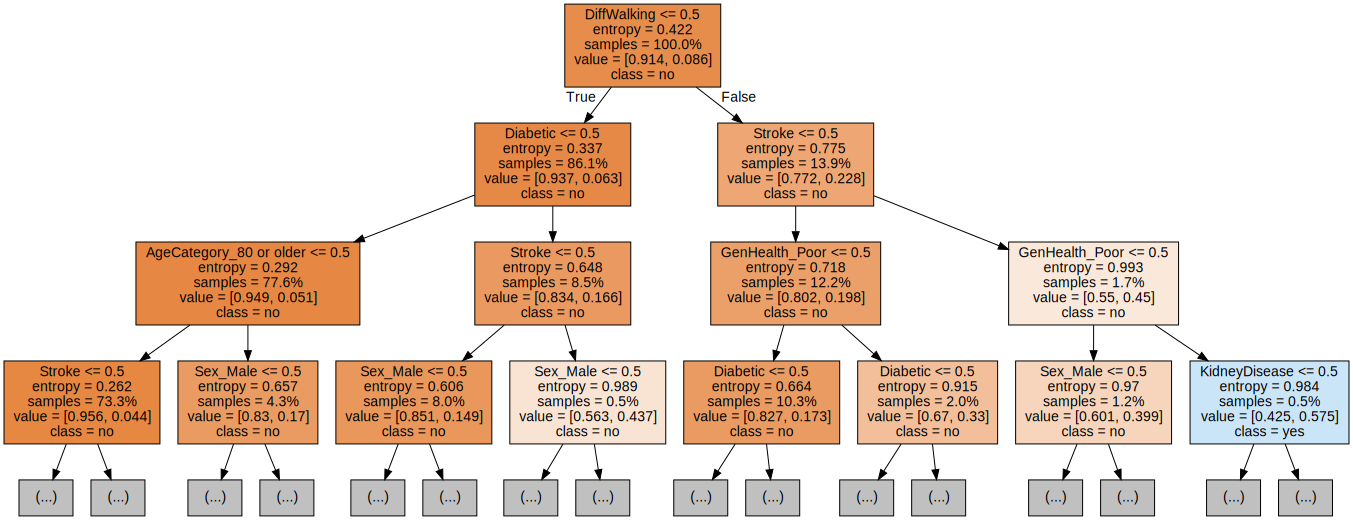

In [ ]:
#만들어진 트리를 확인해보도록 하겠습니다.
#거대한 트리를 한눈에 관찰하기는 어렵기 때문에 depth 제한을 3으로두고 결정트리를 간단하게 확인해 보겠습니다.

import graphviz
from sklearn.tree import export_graphviz

model_dt = pipe.named_steps['decisiontreeclassifier']
enc = pipe.named_steps['onehotencoder']
encoded_columns = enc.transform(X_val).columns

dot_data = export_graphviz(model_dt
                          , max_depth=3
                          , feature_names=encoded_columns
                          , class_names=['no', 'yes']
                          , filled=True
                          , proportion=True)


display(graphviz.Source(dot_data))

In [ ]:
#위에 있던 과적합을 처리합니다. 복잡한 트리는 과적합 가능성을 높이기 때문에 복잡도를 낮추어 일반화를 유도합니다.

pipe = make_pipeline(
    OneHotEncoder(use_cat_names=True), 
    SimpleImputer(), 
    DecisionTreeClassifier(min_samples_leaf=10, random_state=2)
)

pipe.fit(X_train, y_train)
print('훈련 정확도', pipe.score(X_train, y_train))
print('검증 정확도', pipe.score(X_val, y_val))

훈련 정확도 0.9258066722692361
검증 정확도 0.9057809568480301


In [ ]:
#max_depth를 제한해 봅니다.

pipe = make_pipeline(
    OneHotEncoder(use_cat_names=True), 
    SimpleImputer(), 
    DecisionTreeClassifier(max_depth=6, random_state=2)
)

pipe.fit(X_train, y_train)
print('훈련 정확도', pipe.score(X_train, y_train))
print('검증 정확도', pipe.score(X_val, y_val))

훈련 정확도 0.9160933804991498
검증 정확도 0.9149859287054409


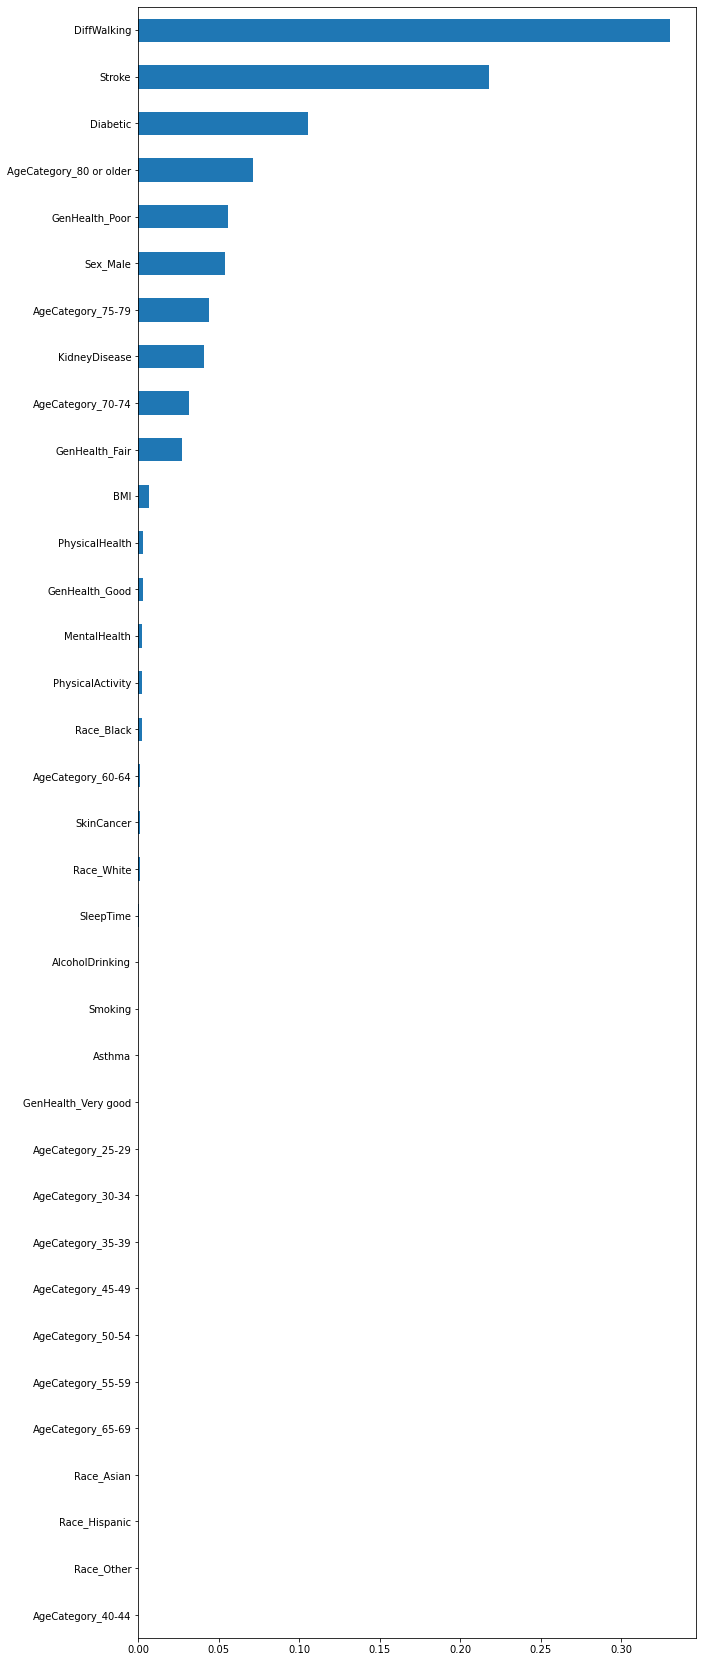

In [ ]:
#결정트리에서 확인 가능한 특성의 중요도를 알아봅니다.
#특성이 얼마나 분기에 자주 사용되는지 결정됩니다.
model_dt = pipe.named_steps['decisiontreeclassifier']

importances = pd.Series(model_dt.feature_importances_, encoded_columns)
plt.figure(figsize=(10,30))
importances.sort_values().plot.barh();

In [ ]:
# 성능 평가지표를 위해서 파이프라인을 만들어 봅시다.
from sklearn.pipeline import make_pipeline
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

pipe = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(), 
    RandomForestClassifier(n_estimators=100, random_state=2, n_jobs=-1)
)


pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_val)
print('검증 정확도: ', accuracy_score(y_val, y_pred))

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


검증 정확도:  0.9035139149468417


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


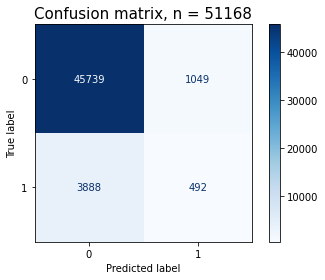

In [ ]:
#분류 모델의 성능 평가지표를 보여주는 Confusion matrix 에 관해 살펴봅니다.

from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
pcm = plot_confusion_matrix(pipe, X_val, y_val,
                            cmap=plt.cm.Blues,
                            ax=ax);
plt.title(f'Confusion matrix, n = {len(y_val)}', fontsize=15)
plt.show()

In [ ]:
cm = pcm.confusion_matrix
cm

array([[45739,  1049],
       [ 3888,   492]])

In [ ]:
#심장병이 없는 사람을 Positive라고 할 때 TP, TN, FP, FN을 정의합니다.
tp = 45739
tn = 492
fp = 3888
fn = 1049

total = tp + tn + fp + fn
total

51168

In [ ]:
#심장병이 아닌사람을 올바르게 예측한 경우는?
tp

45739

In [ ]:
#심장병이 아닌사람을 잘못 예측한 경우는 ?
fp

3888

In [ ]:
#심장병이 아닌사람에 대한 정밀도
positives = tp + fp
tp/positives

0.921655550406029

In [ ]:
#실제 심장병이 아닌경우는 얼마나 됩니까?
real_positives = tp + fn
real_positives

46788

In [ ]:
#심장병에 대한 재현율
tp / real_positives

0.9775797212960589

In [ ]:
#정확도
(tp+tn) / (total)

0.9035139149468417

In [ ]:
pipe.predict_proba(X_val)

array([[1.  , 0.  ],
       [1.  , 0.  ],
       [0.72, 0.28],
       ...,
       [0.93, 0.07],
       [0.96, 0.04],
       [1.  , 0.  ]])

In [ ]:
#심장병이 아닌 확률

y_pred_proba = pipe.predict_proba(X_val)[:, 1]
y_pred_proba

array([0.  , 0.  , 0.28, ..., 0.07, 0.04, 0.  ])

In [ ]:
#실제 타겟 값과 예측확률을 데이터프레임으로 만들어 같이 확인해 봅니다.

pred_proba = pd.DataFrame({
    'y_val': y_val,
    'pred_proba': y_pred_proba})
pred_proba

,y_val,pred_proba
113663,0,0.00
238968,0,0.00
52452,0,0.28
265982,0,0.01
268,0,0.28
...,...,...
253562,0,0.00
155186,1,0.06
302797,0,0.07
63970,0,0.04


In [ ]:
#심장병 확률이 낮은순서로 정렬합니다.
top = pred_proba.sort_values(by='pred_proba', ascending=True)[:51168]
top

,y_val,pred_proba
113663,0,0.00
229526,0,0.00
87186,0,0.00
131915,0,0.00
294092,0,0.00
...,...,...
83745,0,0.92
237059,0,0.93
279739,0,0.94
28369,1,0.94


In [ ]:
#ROC Curve 값을 찾아봅니다.
#ROC Curve란 위에서 보았던 재현율을 최대한 높이고, 암환자인데 암환자가 아니라고 나올 확률을 최대한 낮출수있는 수치를 찾아주는 그래프입니다.

from sklearn.metrics import roc_curve

# roc_curve(타겟값, prob of 1)
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)

roc = pd.DataFrame({
    'FPR(Fall-out)': fpr, 
    'TPRate(Recall)': tpr, 
    'Threshold': thresholds
})
roc

,FPR(Fall-out),TPRate(Recall),Threshold
0,0.000000,0.000000,1.960000
1,0.000021,0.000000,0.960000
2,0.000043,0.000228,0.940000
3,0.000064,0.000228,0.930000
4,0.000107,0.000228,0.920000
...,...,...,...
646,0.590814,0.924429,0.001250
647,0.590878,0.924429,0.001111
648,0.590921,0.924429,0.001000
649,0.590942,0.924429,0.000769


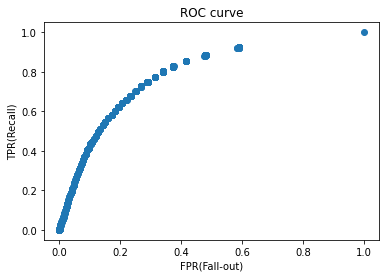

In [ ]:
plt.scatter(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('FPR(Fall-out)')
plt.ylabel('TPR(Recall)');

In [ ]:
# threshold 최대값의 인덱스, np.argmax()
import numpy as np
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

print('idx:', optimal_idx, ', threshold:', optimal_threshold)

idx: 500 , threshold: 0.05083333333333333


In [ ]:
from sklearn.metrics import classification_report

y_pred_optimal = y_pred_proba >= optimal_threshold
print(classification_report(y_val, y_pred_optimal))

              precision    recall  f1-score   support

           0       0.97      0.69      0.80     46788
           1       0.19      0.78      0.30      4380

    accuracy                           0.69     51168
   macro avg       0.58      0.73      0.55     51168
weighted avg       0.90      0.69      0.76     51168



In [ ]:
y_pred_05 = y_pred_proba >= 0.5
print(classification_report(y_val, y_pred_05))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     46788
           1       0.32      0.12      0.17      4380

    accuracy                           0.90     51168
   macro avg       0.62      0.55      0.56     51168
weighted avg       0.87      0.90      0.88     51168



In [ ]:
#Auc 스코어는 위에서 구한 ROC 그래프의 아래쪽 공간의 크기를 계산해주는 수식입니다. 1과 가까울수록 좋습니다.
# 0.7~0.8 Normal / 0.8~0.9 Good / 0.9~1 Excellent

from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(y_val, y_pred_proba)
auc_score

0.7904121861438147

In [ ]:
#선형모델을 만들어 교차검증
#교차검증이란 데이터를 등분하여 3가지로 나누어서 A,B,C,가 있다면 A를 B와C에 검증 / B를 A와 C에 검증 / C를 A와B에 검증 이런식으로 번갈아가면서 전체를 다 검증해보는 방식입니다.
#k 수치는 윗줄에 있는 등분 갯수입니다. 예를 들면 k = 4 = A,B,C,D / k = 5 A,B,C,D,E

from category_encoders import OneHotEncoder
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


pipe = make_pipeline(
    OneHotEncoder(use_cat_names=True), 
    SimpleImputer(strategy='mean'), 
    StandardScaler(), 
    SelectKBest(f_regression, k=20),
    Ridge(alpha=1.0)
)

# 3-fold 교차검증을 수행합니다.
k = 3
scores = cross_val_score(pipe, X_train, y_train, cv=k, 
                         scoring='neg_mean_absolute_error')

print(f'MAE ({k} folds):', -scores)

MAE (3 folds): [0.14134352 0.14071261 0.14003637]


In [ ]:
#랜덤포레스트에 적용

from category_encoders import TargetEncoder
from sklearn.ensemble import RandomForestRegressor

pipe = make_pipeline(
    # TargetEncoder: 범주형 변수 인코더로, 타겟값을 특성의 범주별로 평균내어 그 값으로 인코딩
    TargetEncoder(min_samples_leaf=1, smoothing=1), 
    SimpleImputer(strategy='median'), 
    RandomForestRegressor(max_depth = 10, n_jobs=-1, random_state=2)
)

k = 3

scores = cross_val_score(pipe, X_train, y_train, cv=k, 
                         scoring='neg_mean_absolute_error')

print(f'MAE for {k} folds:', -scores)

MAE for 3 folds: [0.13378754 0.133062   0.1320442 ]


In [ ]:
-scores.mean()

0.13296458139164932

In [ ]:
scores.std()

0.0007150425011628279

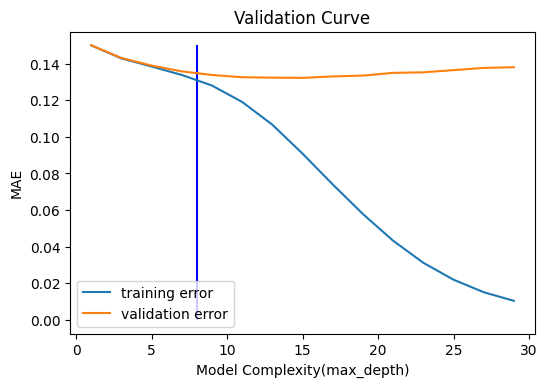

In [ ]:
#일반화는 학습된 모델이 처음 본 데이터에서 얼마나 좋은 성능을 내는지를 확인합니다.
#우리 모델은 max_depth가 8 부근에서 설정해주어야 과적합을 막고 일반화 성능을 지킬 수 있습니다.
import matplotlib.pyplot as plt
from category_encoders import OrdinalEncoder
from sklearn.model_selection import validation_curve
from sklearn.tree import DecisionTreeRegressor

pipe = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(), 
    DecisionTreeRegressor()
)
depth = range(1, 30, 2)
ts, vs = validation_curve(pipe, X_train, y_train, param_name='decisiontreeregressor__max_depth', param_range=depth, scoring='neg_mean_absolute_error', cv=3, n_jobs=-1)

train_scores_mean = np.mean(-ts, axis=1)
validation_scores_mean = np.mean(-vs, axis=1)

fig, ax = plt.subplots()

# 훈련세트 검증곡선
ax.plot(depth, train_scores_mean, label='training error')

# 검증세트 검증곡선
ax.plot(depth, validation_scores_mean, label='validation error')

# 이상적인 max_depth
ax.vlines(8,0, train_scores_mean.max(), color='blue')

# 그래프 셋팅
ax.set(title='Validation Curve'
      , xlabel='Model Complexity(max_depth)', ylabel='MAE')
ax.legend()
fig.dpi = 100

In [ ]:
#하이퍼 파라미터
#하이퍼 파라미터의 최적화는 훈련 데이터로 더 좋은 성능을 얻기 위해 모델을 조정해 나가는 과정입니다.
from sklearn.model_selection import RandomizedSearchCV

pipe = make_pipeline(
    OneHotEncoder(use_cat_names=True)
    , SimpleImputer()
    , StandardScaler()
    , SelectKBest(f_regression)
    , Ridge()
)

# 튜닝할 하이퍼파라미터의 범위를 지정해 주는 부분
dists = {
    'simpleimputer__strategy': ['mean', 'median'], 
    'selectkbest__k': range(1, len(X_train.columns)+1), 
    'ridge__alpha': [0.1, 1, 10], 
}

clf = RandomizedSearchCV(
    pipe, 
    param_distributions=dists, 
    n_iter=50, 
    cv=3,
    scoring='neg_mean_absolute_error',
    verbose=1,
    n_jobs=-1
)

clf.fit(X_train, y_train);

Fitting 3 folds for each of 50 candidates, totalling 150 fits


In [ ]:
print('최적 하이퍼파라미터: ', clf.best_params_)
print('MAE: ', -clf.best_score_)

최적 하이퍼파라미터:  {'simpleimputer__strategy': 'mean', 'selectkbest__k': 13, 'ridge__alpha': 0.1}
MAE:  0.13605308964851623


In [ ]:
#각 하이퍼파라미터 조합으로 만들어진 모델들을 순위별로 나열해 봅니다.
# rank_test_score: 테스트 순위
# mean_score_time: 예측에 걸리는 시간

pd.DataFrame(clf.cv_results_).sort_values(by='rank_test_score').T

,23,5,41,6,30,4,15,31,27,44,...,17,9,25,49,13,43,34,42,32,12
mean_fit_time,0.429678,0.618507,0.895213,0.474492,1.130146,0.457976,1.259671,0.397233,1.212192,2.217431,...,0.449908,0.762331,1.341601,0.537206,0.65959,0.945564,1.37844,0.779179,0.378493,1.752925
std_fit_time,0.05037,0.055496,0.079578,0.057312,0.033018,0.014868,0.065178,0.01693,0.010114,0.231575,...,0.013399,0.067733,0.030354,0.056067,0.054378,0.048068,0.02146,0.034282,0.018442,0.008342
mean_score_time,0.074011,0.096961,0.14096,0.081295,0.073887,0.095167,0.069121,0.067619,0.086073,0.120337,...,0.077529,0.115211,0.086551,0.098332,0.148941,0.162023,0.10138,0.143712,0.068893,0.131527
std_score_time,0.007028,0.016683,0.014756,0.029392,0.004205,0.018294,0.006538,0.002285,0.006467,0.067577,...,0.00094,0.045845,0.015898,0.03692,0.02302,0.014521,0.004966,0.005166,0.004082,0.031841
param_simpleimputer__strategy,mean,mean,mean,mean,median,mean,median,mean,median,median,...,mean,mean,median,mean,mean,mean,median,mean,mean,median
param_selectkbest__k,13,12,11,10,10,9,9,8,8,7,...,3,32,32,32,33,35,35,2,2,1
param_ridge__alpha,0.1,10,1,0.1,10,0.1,1,0.1,10,0.1,...,10,10,1,1,1,1,1,0.1,10,10
params,"{'simpleimputer__strategy': 'mean', 'selectkbe...","{'simpleimputer__strategy': 'mean', 'selectkbe...","{'simpleimputer__strategy': 'mean', 'selectkbe...","{'simpleimputer__strategy': 'mean', 'selectkbe...","{'simpleimputer__strategy': 'median', 'selectk...","{'simpleimputer__strategy': 'mean', 'selectkbe...","{'simpleimputer__strategy': 'median', 'selectk...","{'simpleimputer__strategy': 'mean', 'selectkbe...","{'simpleimputer__strategy': 'median', 'selectk...","{'simpleimputer__strategy': 'median', 'selectk...",...,"{'simpleimputer__strategy': 'mean', 'selectkbe...","{'simpleimputer__strategy': 'mean', 'selectkbe...","{'simpleimputer__strategy': 'median', 'selectk...","{'simpleimputer__strategy': 'mean', 'selectkbe...","{'simpleimputer__strategy': 'mean', 'selectkbe...","{'simpleimputer__strategy': 'mean', 'selectkbe...","{'simpleimputer__strategy': 'median', 'selectk...","{'simpleimputer__strategy': 'mean', 'selectkbe...","{'simpleimputer__strategy': 'mean', 'selectkbe...","{'simpleimputer__strategy': 'median', 'selectk..."
split0_test_score,-0.136733,-0.136962,-0.136959,-0.137945,-0.137946,-0.137979,-0.137979,-0.138652,-0.138652,-0.140266,...,-0.143731,-0.143912,-0.143914,-0.143914,-0.143933,-0.143964,-0.143964,-0.146109,-0.14611,-0.150294
split1_test_score,-0.136138,-0.136387,-0.137254,-0.137336,-0.137337,-0.137337,-0.137337,-0.137865,-0.137866,-0.139234,...,-0.142888,-0.142915,-0.142917,-0.142917,-0.142986,-0.142994,-0.142994,-0.145603,-0.145603,-0.15005


In [ ]:
#랜덤 포레스트에 적용

from scipy.stats import randint, uniform

pipe = make_pipeline(
    TargetEncoder(), 
    SimpleImputer(), 
    RandomForestRegressor(random_state=2)
)

dists = {
    'targetencoder__smoothing': [2.,20.,50.,60.,100.,500.,1000.], # int로 넣으면 error(bug)
    'targetencoder__min_samples_leaf': randint(1, 10),     
    'simpleimputer__strategy': ['mean', 'median'], 
    'randomforestregressor__n_estimators': randint(50, 500), 
    'randomforestregressor__max_depth': [5, 10, 15, 20, None], 
    'randomforestregressor__max_features': uniform(0, 1) # max_features
}

clf = RandomizedSearchCV(
    pipe, 
    param_distributions=dists, 
    n_iter=50, 
    cv=3, 
    scoring='neg_mean_absolute_error',  
    verbose=1,
    n_jobs=-1
)

clf.fit(X_train, y_train);

Fitting 3 folds for each of 50 candidates, totalling 150 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [ ]:
print('최적 하이퍼파라미터: ', clf.best_params_)
print('MAE: ', -clf.best_score_)

최적 하이퍼파라미터:  {'randomforestregressor__max_depth': 15, 'randomforestregressor__max_features': 0.6661623111915261, 'randomforestregressor__n_estimators': 282, 'simpleimputer__strategy': 'mean', 'targetencoder__min_samples_leaf': 9, 'targetencoder__smoothing': 1000.0}
MAE:  0.13203525899304724


In [ ]:
# 만들어진 모델에서 가장 성능이 좋은 모델을 불러옵니다.
pipe = clf.best_estimator_

In [ ]:
from sklearn.metrics import mean_absolute_error

y_pred = pipe.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'테스트세트 MAE: ${mae}')

테스트세트 MAE: $0.1321664568562021


In [ ]:
#위에서 만든 모델을 test 데이터에 대입해보겠습니다.

from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report

pipe = Pipeline([
    ('preprocessing', make_pipeline(OrdinalEncoder(), SimpleImputer())),
    ('xgbclassifier', XGBClassifier(n_estimators=200, random_state=2, n_jobs=-1, max_depth=7, learning_rate=0.2))
])

pipe.fit(X_train, y_train);

from sklearn.metrics import accuracy_score
y_pred = pipe.predict(X_test)
print('검증 정확도:', accuracy_score(y_pred, y_test))
print(classification_report(y_pred, y_test))

검증 정확도: 0.9138979658843946
              precision    recall  f1-score   support

           0       0.99      0.92      0.95     62773
           1       0.11      0.49      0.17      1186

    accuracy                           0.91     63959
   macro avg       0.55      0.70      0.56     63959
weighted avg       0.97      0.91      0.94     63959



In [ ]:
pip install PDPbox

     |████████████████████████████████| 34.0 MB 170 kB/s 
     |████████████████████████████████| 13.1 MB 40.5 MB/s 
  Created wheel for PDPbox: filename=PDPbox-0.2.1-py3-none-any.whl size=35758224 sha256=114cadd0b75163c85a6868b9d72c41fa755816b8bce55cd4c3594ae932a576fc
  Stored in directory: /root/.cache/pip/wheels/f4/d0/1a/b80035625c53131f52906a6fc4dd690d8efd2bf8af6a4015eb
Successfully built PDPbox
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
pip install shap

     |████████████████████████████████| 564 kB 5.4 MB/s 


[07:41:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


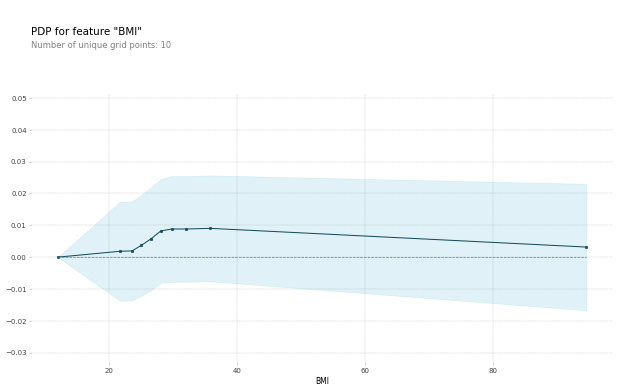

In [ ]:
import xgboost
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 50

from pdpbox.pdp import pdp_isolate, pdp_plot
feature = 'BMI'

isolated = pdp_isolate(
    model=xgboost.XGBRegressor().fit(X_train, y_train), 
    dataset=X_train, 
    model_features=X_train.columns, 
    feature=feature,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)
pdp_plot(isolated, feature_name=feature);

[07:42:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


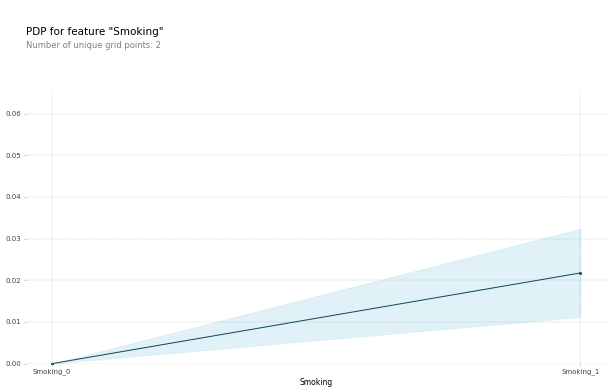

In [ ]:
import xgboost
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 50

from pdpbox.pdp import pdp_isolate, pdp_plot
feature = 'Smoking'

isolated = pdp_isolate(
    model=xgboost.XGBRegressor().fit(X_train, y_train), 
    dataset=X_train, 
    model_features=X_train.columns, 
    feature=feature,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)
pdp_plot(isolated, feature_name=feature);

[07:44:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


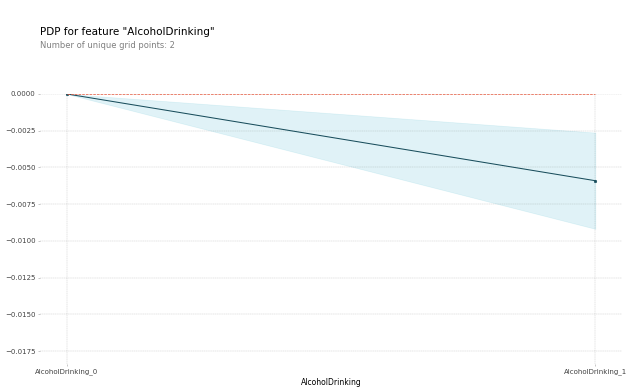

In [ ]:
import xgboost
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 50

from pdpbox.pdp import pdp_isolate, pdp_plot
feature = 'AlcoholDrinking'

isolated = pdp_isolate(
    model=xgboost.XGBRegressor().fit(X_train, y_train), 
    dataset=X_train, 
    model_features=X_train.columns, 
    feature=feature,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)
pdp_plot(isolated, feature_name=feature);

[07:45:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


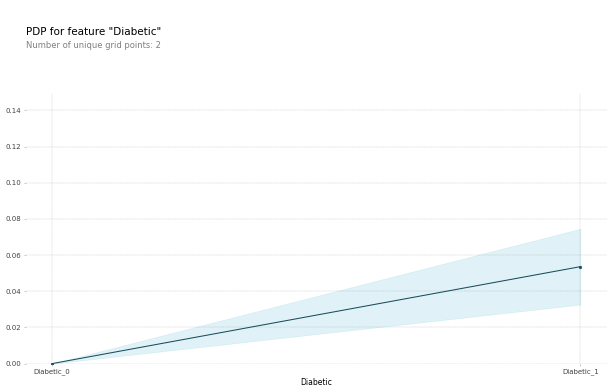

In [ ]:
import xgboost
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 50

from pdpbox.pdp import pdp_isolate, pdp_plot
feature = 'Diabetic' #당뇨병

isolated = pdp_isolate(
    model=xgboost.XGBRegressor().fit(X_train, y_train), 
    dataset=X_train, 
    model_features=X_train.columns, 
    feature=feature,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)
pdp_plot(isolated, feature_name=feature);

[07:46:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


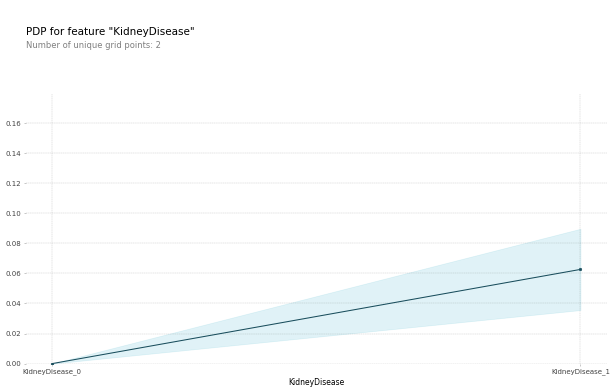

In [ ]:
import xgboost
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 50

from pdpbox.pdp import pdp_isolate, pdp_plot
feature = 'KidneyDisease' #신장병

isolated = pdp_isolate(
    model=xgboost.XGBRegressor().fit(X_train, y_train), 
    dataset=X_train, 
    model_features=X_train.columns, 
    feature=feature,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)
pdp_plot(isolated, feature_name=feature);

In [ ]:
from xgboost import XGBRegressor

encoder = OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)

boosting = XGBRegressor(
    n_estimators=1000,
    objective='reg:squarederror', # default
    learning_rate=0.2,
    n_jobs=-1
)

eval_set = [(X_train_encoded, y_train)]

boosting.fit(X_train_encoded, y_train, 
          eval_set=eval_set,
          early_stopping_rounds=50)

[0]	validation_0-rmse:0.431217
Will train until validation_0-rmse hasn't improved in 50 rounds.
[1]	validation_0-rmse:0.379879
[2]	validation_0-rmse:0.343444
[3]	validation_0-rmse:0.316907
[4]	validation_0-rmse:0.298954
[5]	validation_0-rmse:0.286188
[6]	validation_0-rmse:0.27765
[7]	validation_0-rmse:0.271794
[8]	validation_0-rmse:0.267875
[9]	validation_0-rmse:0.26526
[10]	validation_0-rmse:0.263141
[11]	validation_0-rmse:0.261775
[12]	validation_0-rmse:0.260686
[13]	validation_0-rmse:0.259972
[14]	validation_0-rmse:0.259316
[15]	validation_0-rmse:0.258891
[16]	validation_0-rmse:0.258506
[17]	validation_0-rmse:0.258328
[18]	validation_0-rmse:0.258015
[19]	validation_0-rmse:0.257792
[20]	validation_0-rmse:0.257565
[21]	validation_0-rmse:0.257432
[22]	validation_0-rmse:0.257285
[23]	validation_0-rmse:0.257224
[24]	validation_0-rmse:0.257092
[25]	validation_0-rmse:0.257021
[26]	validation_0-rmse:0.256906
[27]	validation_0-rmse:0.256846
[28]	validation_0-rmse:0.256752
[29]	validation_0-r

XGBRegressor(learning_rate=0.2, n_estimators=1000, n_jobs=-1,
             objective='reg:squarederror')

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


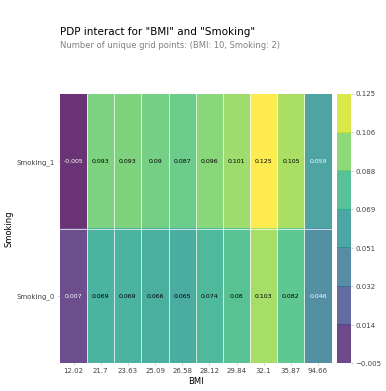

In [ ]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

features = ['BMI', 'Smoking']

interaction = pdp_interact(
    model=boosting, 
    dataset=X_train_encoded,
    model_features=X_train.columns, 
    features=features
)

pdp_interact_plot(interaction, plot_type='grid', 
                  feature_names=features);

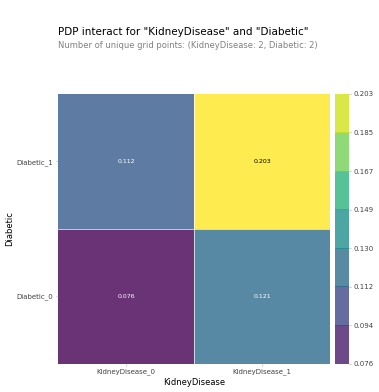

In [ ]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

features = ['KidneyDisease','Diabetic']

interaction = pdp_interact(
    model=boosting, 
    dataset=X_train_encoded,
    model_features=X_train.columns, 
    features=features
)

pdp_interact_plot(interaction, plot_type='grid', 
                  feature_names=features);

In [ ]:
### Draw SHAP plots ###

import shap
model = xgboost.XGBRegressor().fit(X_train, y_train)
explainer = shap.TreeExplainer(model)


def predict(BMI, Smoking, KidneyDisease, Diabetic):

    # 함수 내에서 예측에 사용될 input을 만듭니다
    df = pd.DataFrame(
        data=[[BMI, Smoking, KidneyDisease, Diabetic]], 
        columns=['BMI', 'Smoking', 'KidneyDisease', 'Diabetic']
    )

    # 예측
    pred = model.predict(df)[0]

    # Shap value를 계산합니다
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(df)

    # Shap value, 특성이름, 특성값을 가지는 Series를 만듭니다
    feature_names = df.columns
    feature_values = df.values[0]
    shaps = pd.Series(shap_values[0], zip(feature_names, feature_values))

    # 결과를 프린트 합니다.
    result = f'평균가격: ${explainer.expected_value[0]:,.0f} \n'
    result += f'예측가격: ${pred:,.0f}. \n'
    result += shaps.to_string()
    print(result)


    # SHAP Force Plot
    shap.initjs()
    return shap.force_plot(
        base_value=explainer.expected_value, 
        shap_values=shap_values, 
        features=df
    )

[07:59:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


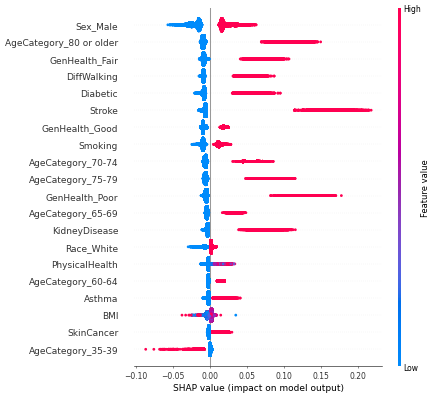

In [ ]:
shap_values = explainer.shap_values(X_test.iloc[:63959])
shap.summary_plot(shap_values, X_test.iloc[:63959])

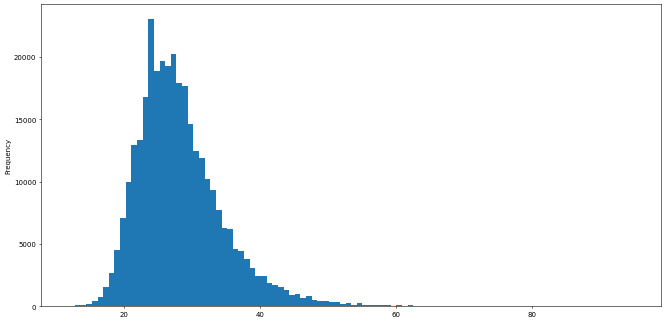

In [ ]:
df['BMI'].plot.hist(bins=100, figsize=(16, 8));

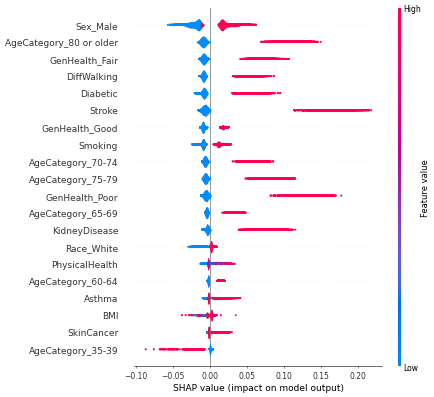

In [ ]:
shap.summary_plot(shap_values, X_test.iloc[:63959], plot_type="violin")

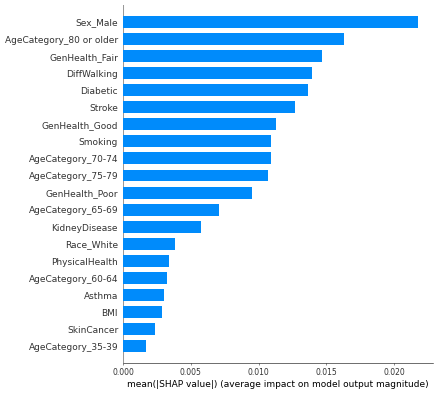

In [ ]:
shap.summary_plot(shap_values, X_test.iloc[:63959], plot_type="bar")

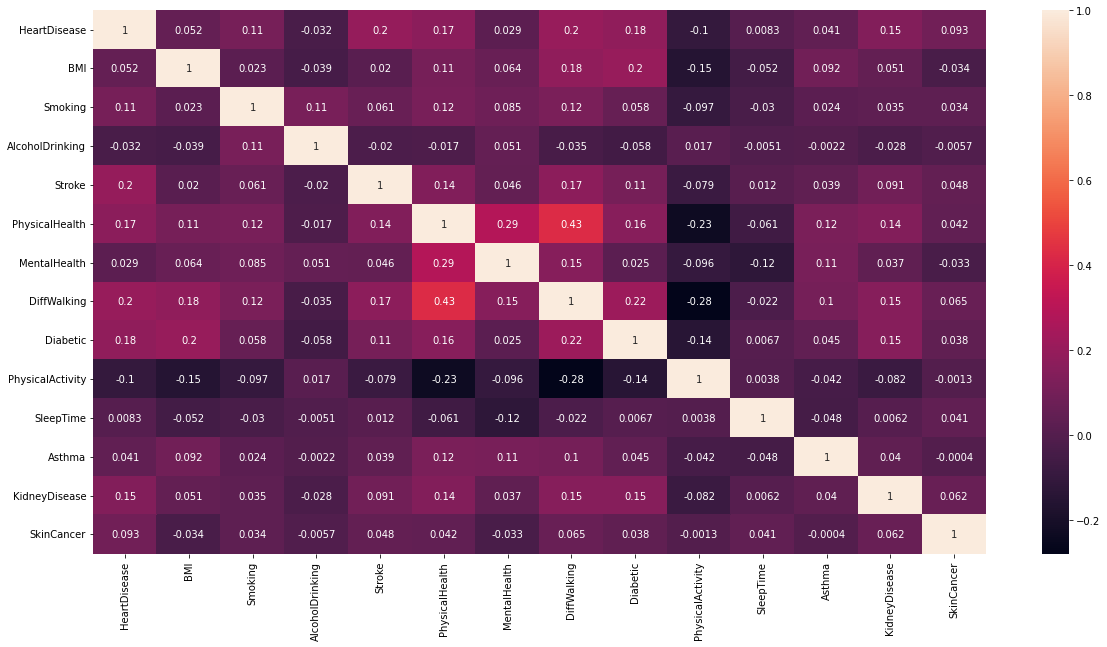

In [ ]:
#다양한 질병 간의 상관관게를 분석합니다.
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (20,10))
sns.heatmap(df_1.corr(),annot = True)
plt.show()

In [ ]:
#질병의 특징만 생각해 봅니다.
diseases = df_1[['HeartDisease', 'Stroke', 'Diabetic', 'KidneyDisease', 'SkinCancer']]
diseases.head()

,HeartDisease,Stroke,Diabetic,KidneyDisease,SkinCancer
0,0,0,1,0,1
1,0,1,0,0,0
2,0,0,1,0,0
3,0,0,0,0,1
4,0,0,0,0,0


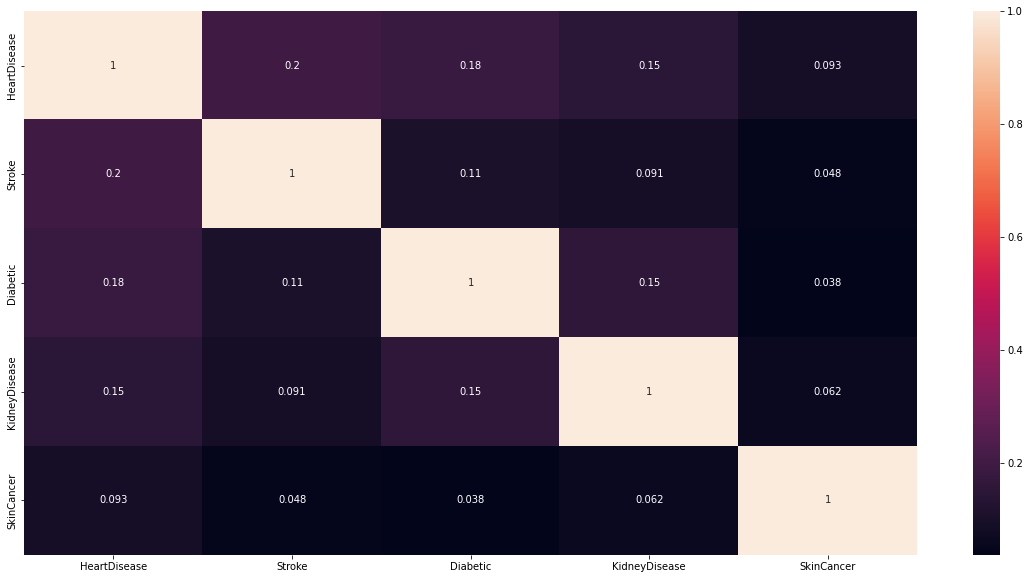

In [ ]:
plt.figure(figsize = (20,10))
sns.heatmap(diseases.corr(),annot = True)
plt.show()

In [ ]:
df_1 = df_1.fillna(0)

In [ ]:
df_1.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3,30,0,Female,55-59,White,1,1,Very good,5,1,0,1
1,0,20.34,0,0,1,0,0,0,Female,80 or older,White,0,1,Very good,7,0,0,0
2,0,26.58,1,0,0,20,30,0,Male,65-69,White,1,1,Fair,8,1,0,0
3,0,24.21,0,0,0,0,0,0,Female,75-79,White,0,0,Good,6,0,0,1
4,0,23.71,0,0,0,28,0,1,Female,40-44,White,0,1,Very good,8,0,0,0


In [ ]:
#당뇨병이 심장병에 영향을 미치는지 확인해봅니다.
diabetics = df_1[df_1.Diabetic==1]
heart_d = sum(diabetics.HeartDisease)/len(diabetics)

print('심장병이 있는 당뇨병 환자의 수 : ', heart_d)

heart_patients = df_1[df_1.HeartDisease==1]
diabs = sum(heart_patients.Diabetic)/len(heart_patients)
print('당뇨병이 있는 심장병 환자의 수 : ', diabs)

심장병이 있는 당뇨병 환자의 수 :  0.21952355276702123
당뇨병이 있는 심장병 환자의 수 :  0.3272202535345048


In [ ]:
#당뇨병이 신장병에 영향을 미치는지 알아봅니다.
diabet = df_1[df_1.Diabetic==1]
diabet_1 = sum(diabet.KidneyDisease)/len(diabet)

print('신장질환이 있는 당뇨병 환자의 수 : ',diabet_1)

kidney_patients = df_1[df_1.KidneyDisease==1]
diabsk = sum(kidney_patients.Diabetic)/len(kidney_patients)
print('당뇨병을 앓고 있는 신장질환자의 수 : ', diabsk)

신장질환이 있는 당뇨병 환자의 수 :  0.11281309739718641
당뇨병을 앓고 있는 신장질환자의 수 :  0.39078020205450376


In [ ]:
#BMI가 질병에 미치는 영향을 알아봅니다.
diseases_bmi = df_1[['HeartDisease', 'Stroke', 'Diabetic', 'KidneyDisease', 'SkinCancer', 'BMI']]

diseases_bmi.head(20)

,HeartDisease,Stroke,Diabetic,KidneyDisease,SkinCancer,BMI
0,0,0,1,0,1,16.60
1,0,1,0,0,0,20.34
2,0,0,1,0,0,26.58
3,0,0,0,0,1,24.21
4,0,0,0,0,0,23.71
5,1,0,0,0,0,28.87
6,0,0,0,0,1,21.63
7,0,0,1,0,0,31.64
8,0,0,0,1,0,26.45
9,0,0,0,0,0,40.69


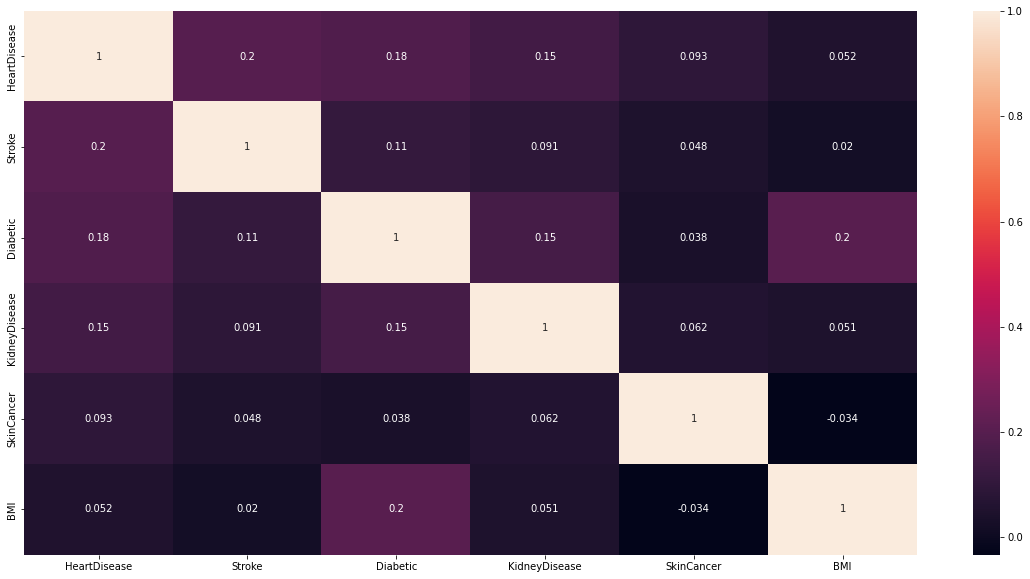

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(diseases_bmi.corr(), annot=True)
plt.show()